# OWLSentimentAnalysis - Sentiment

## Declare Environments

In [1]:
from config import teams
class Environment:
    pass
env = Environment()

env.data_dir = 'data'
env.logo_dir = 'logos'
env.team_list = teams

## Useful functions

In [2]:
import os
def generate_team_file_path(team_list, team_data_dir):
    teams_path_dict = {}
    for root, dirs, files in os.walk(team_data_dir):
        teams_path_dict.update({
            team_name: [
                os.path.join(team_data_dir, file) for file in files
                if file.startswith(team_name)
            ]
            for team_name in team_list
        })
    return teams_path_dict

import json
def get_data_by_team_name(team_name, team_file_paths):
    team_tweet_list = []
    for file_path in team_file_paths[team_name]:
        with open(file_path, 'r') as f:
            json_lines = [line.strip('\n') for line in f]
            json_dicts=[json.loads(json_line) for json_line in json_lines]
            team_tweet_list.extend(json_dicts)
    return team_tweet_list

env.team_file_paths = generate_team_file_path(
    team_list=env.team_list, team_data_dir=env.data_dir)


## Get sentiment from tweet

In [3]:
from textblob import TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

get_sentiment_polarity('Today is a good day.')

0.7

### get (date, sentiment) combination

In [4]:
import datetime
def get_combination(tweet_json):
    date=datetime.datetime.strptime(tweet_json['date'], "%a %b %d %H:%M:%S %z %Y")
    polarity = get_sentiment_polarity(tweet_json['text'])
    return (date,polarity)

def get_combination_by_team_name(team_name, team_file_paths):
    t_list = get_data_by_team_name(team_name, team_file_paths)
    comb_list = [get_combination(t) for t in t_list]
    return comb_list

get_combination_by_team_name('Vancouver Titans',env.team_file_paths)

[(datetime.datetime(2019, 4, 20, 18, 50, 54, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 43, 32, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 38, 31, tzinfo=datetime.timezone.utc),
  0.8),
 (datetime.datetime(2019, 4, 20, 18, 36, 38, tzinfo=datetime.timezone.utc),
  0.15),
 (datetime.datetime(2019, 4, 20, 18, 28, 46, tzinfo=datetime.timezone.utc),
  0.35),
 (datetime.datetime(2019, 4, 20, 18, 13, 3, tzinfo=datetime.timezone.utc),
  -0.6625),
 (datetime.datetime(2019, 4, 20, 18, 11, 56, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 11, 54, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 11, 41, tzinfo=datetime.timezone.utc),
  0.3888888888888889),
 (datetime.datetime(2019, 4, 20, 18, 11, 26, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 11, 8, tzinfo=datetime.timezone.utc),
  0.0),
 (datetime.datetime(2019, 4, 20, 18, 10, 56, tzinfo=datet

In [5]:
import matplotlib.pyplot as plt
def plot_sentiment(team_name,team_file_paths):
    s=get_combination_by_team_name(team_name,team_file_paths)
    x,y = zip(*s)
    plt.figure(figsize=[50,10])
    plt.scatter(x,y)
    plt.ylim(-1, 1)
    plt.title(team_name)
    plt.show()
    
plot_sentiment("NYXL",env.team_file_paths)

<Figure size 5000x1000 with 1 Axes>

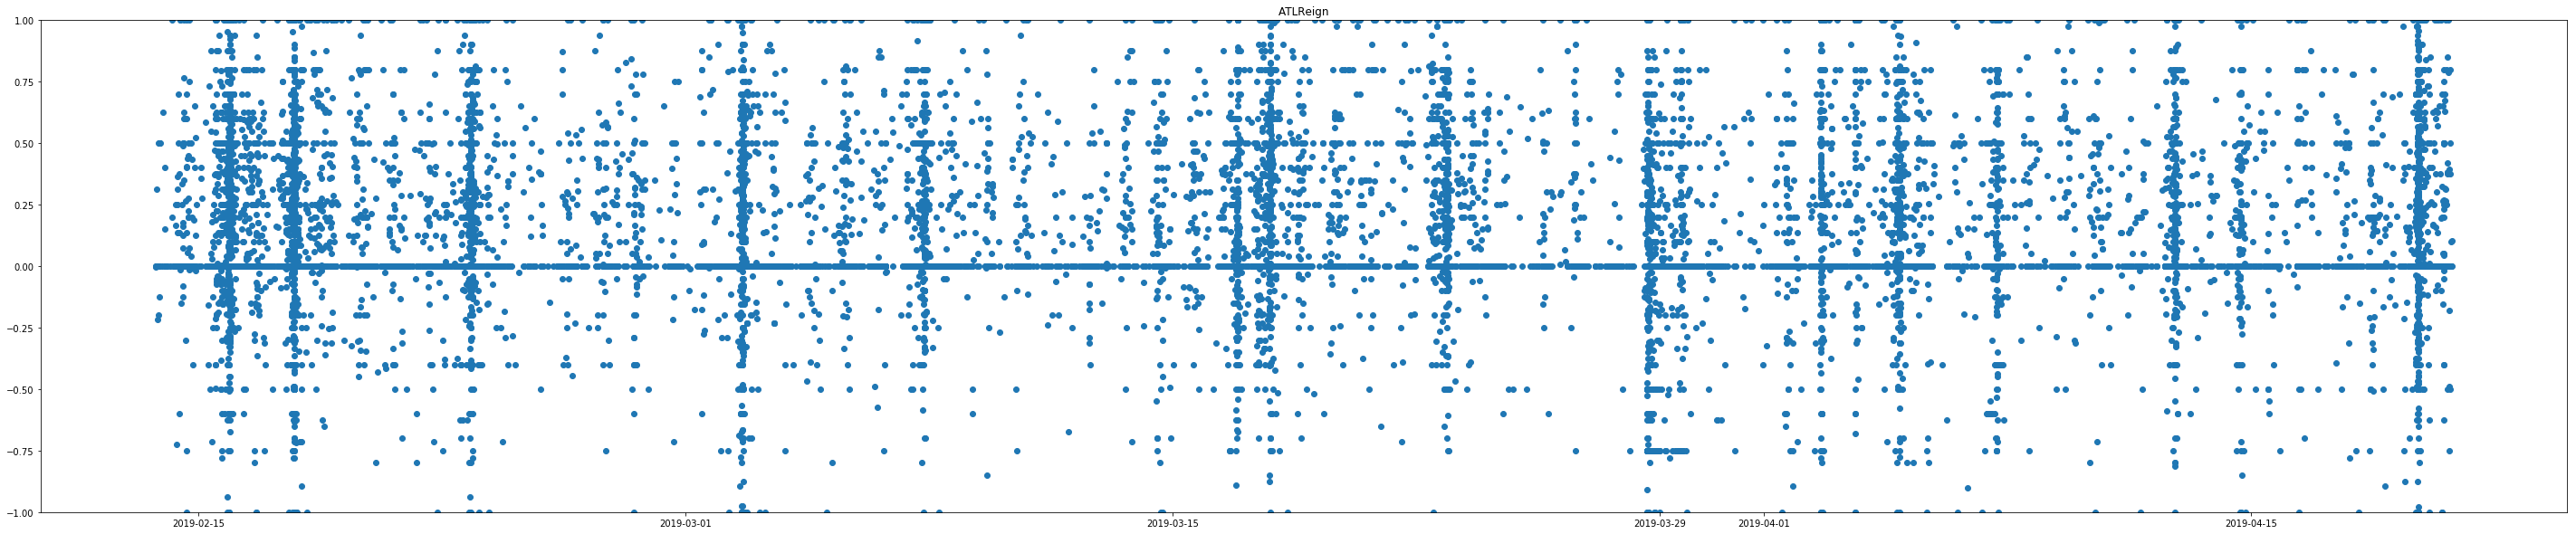

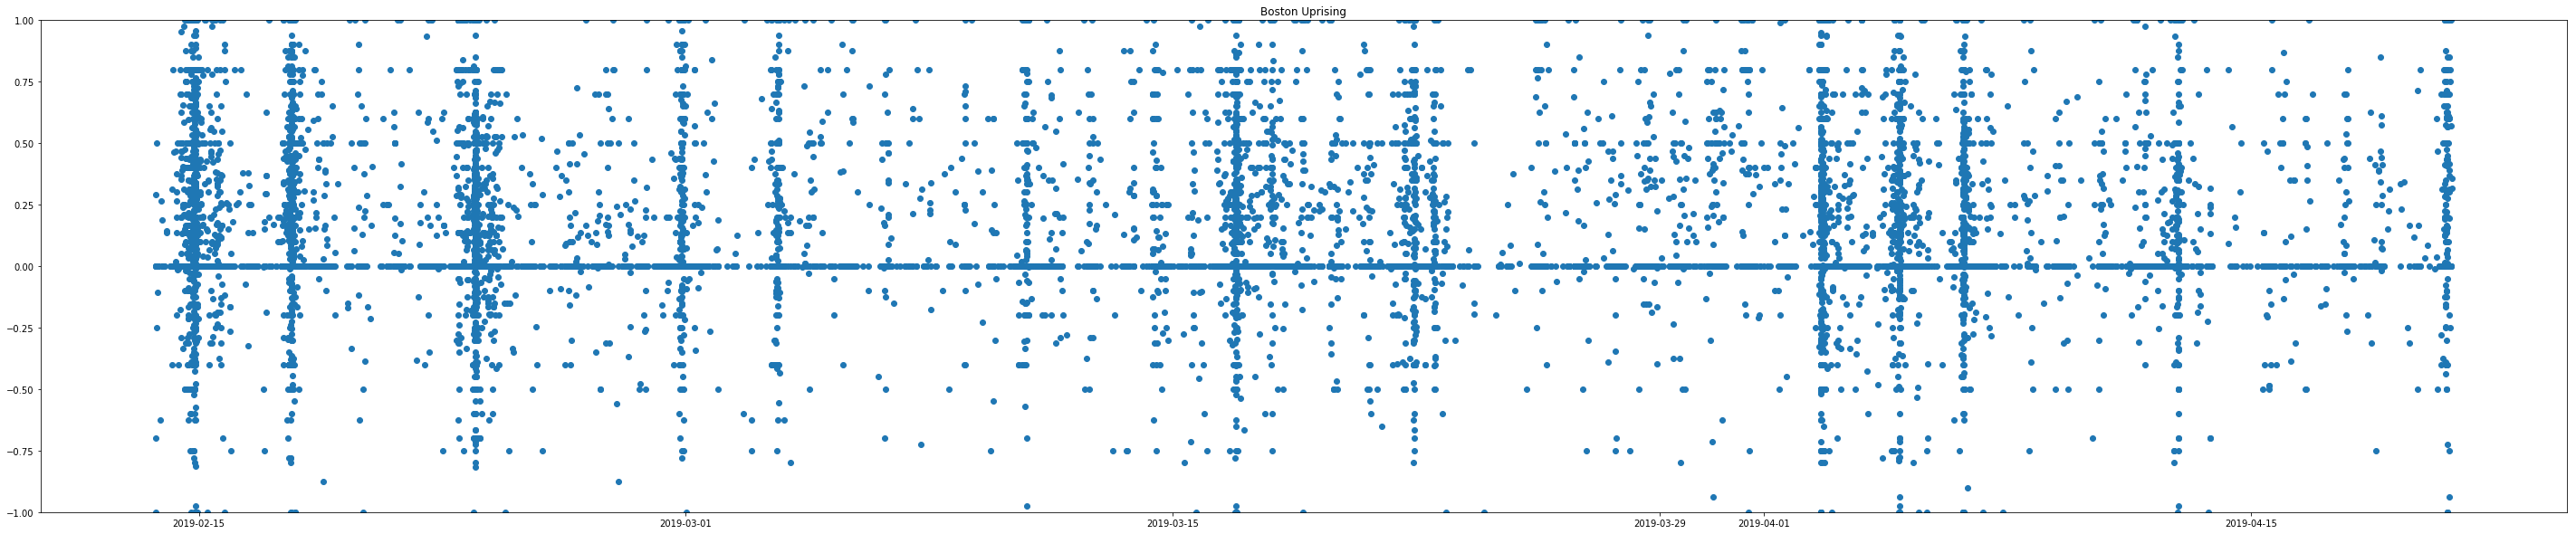

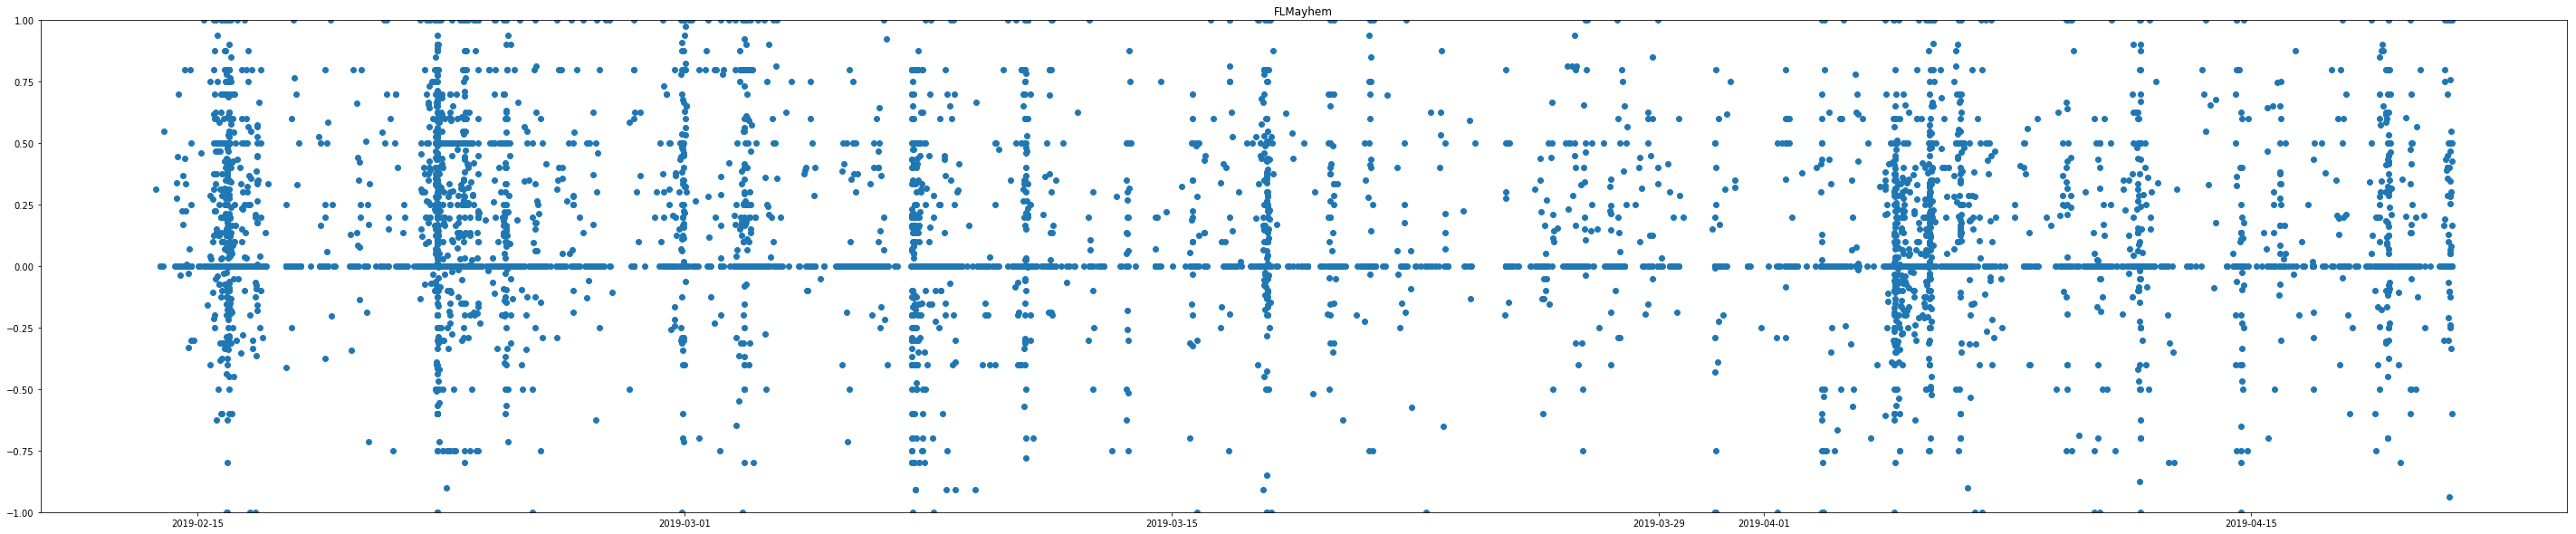

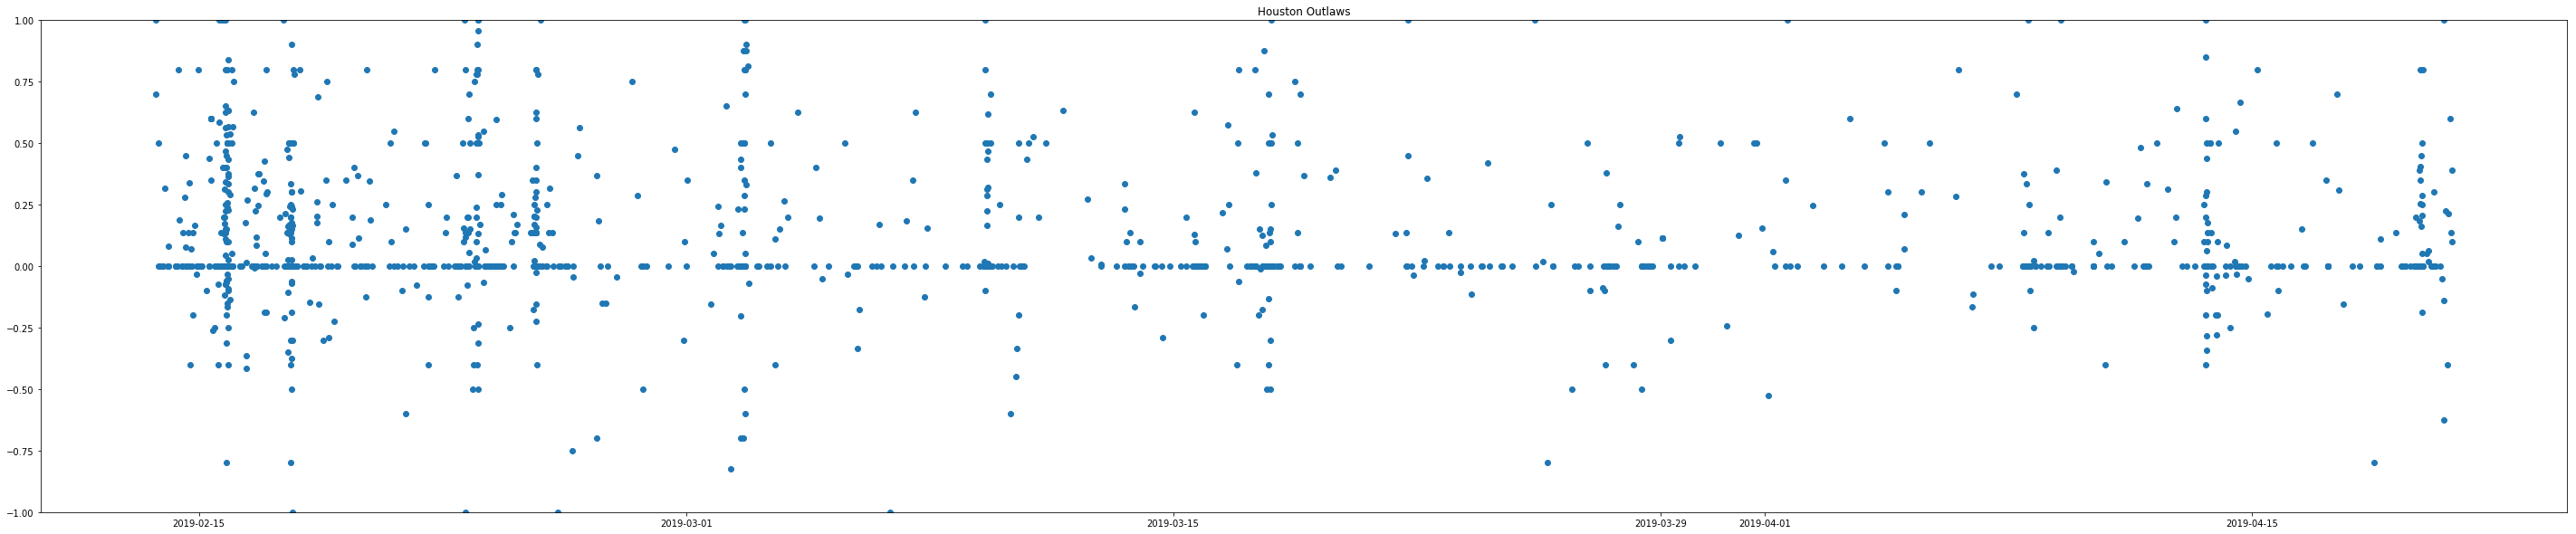

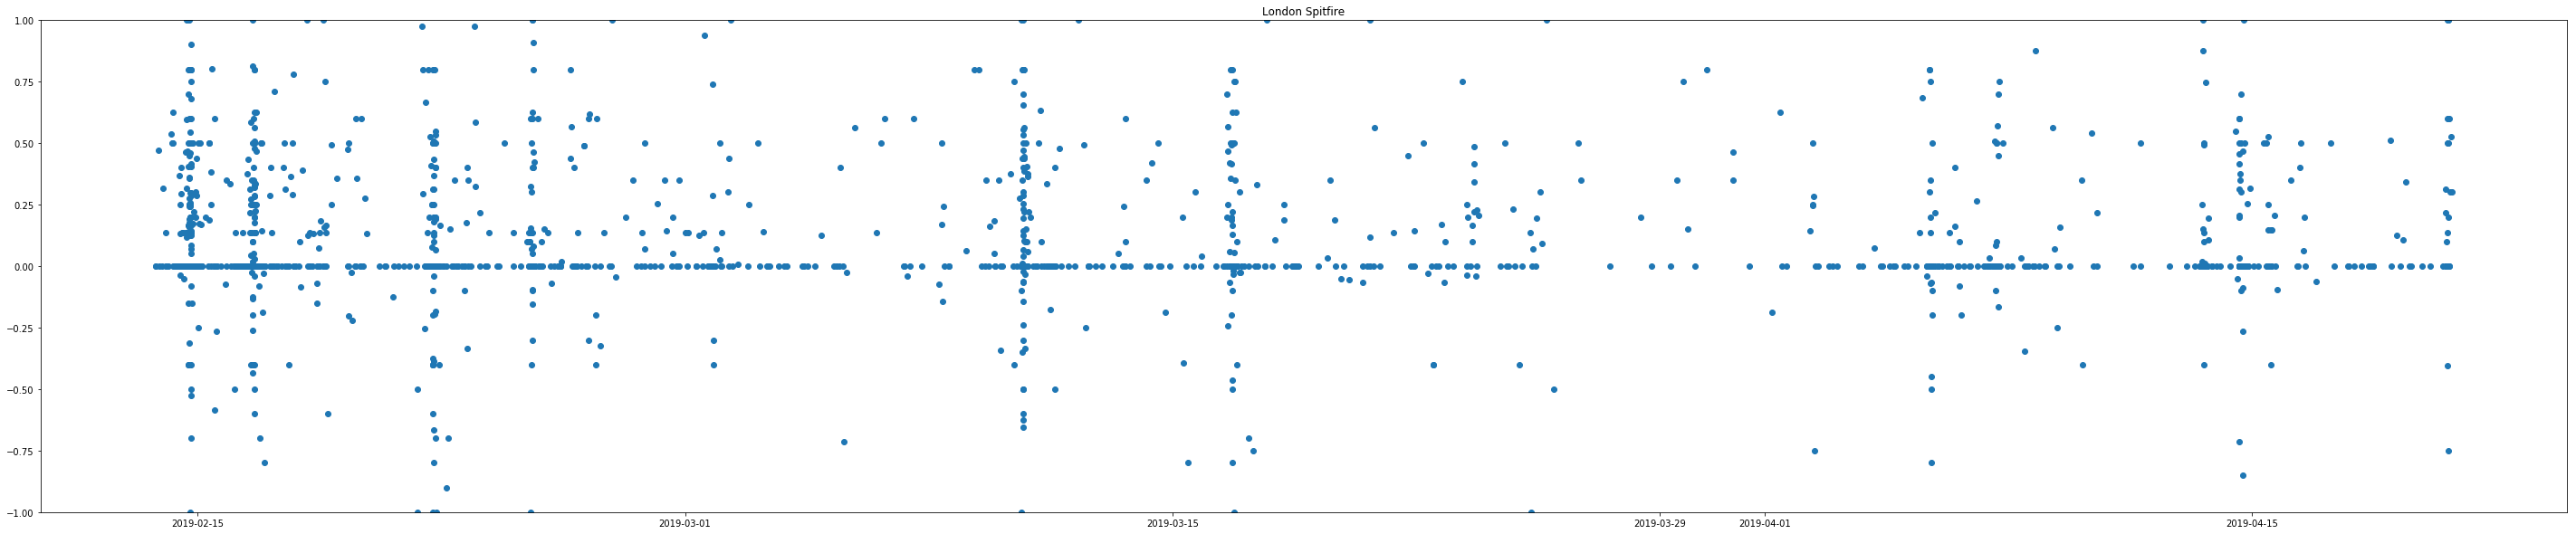

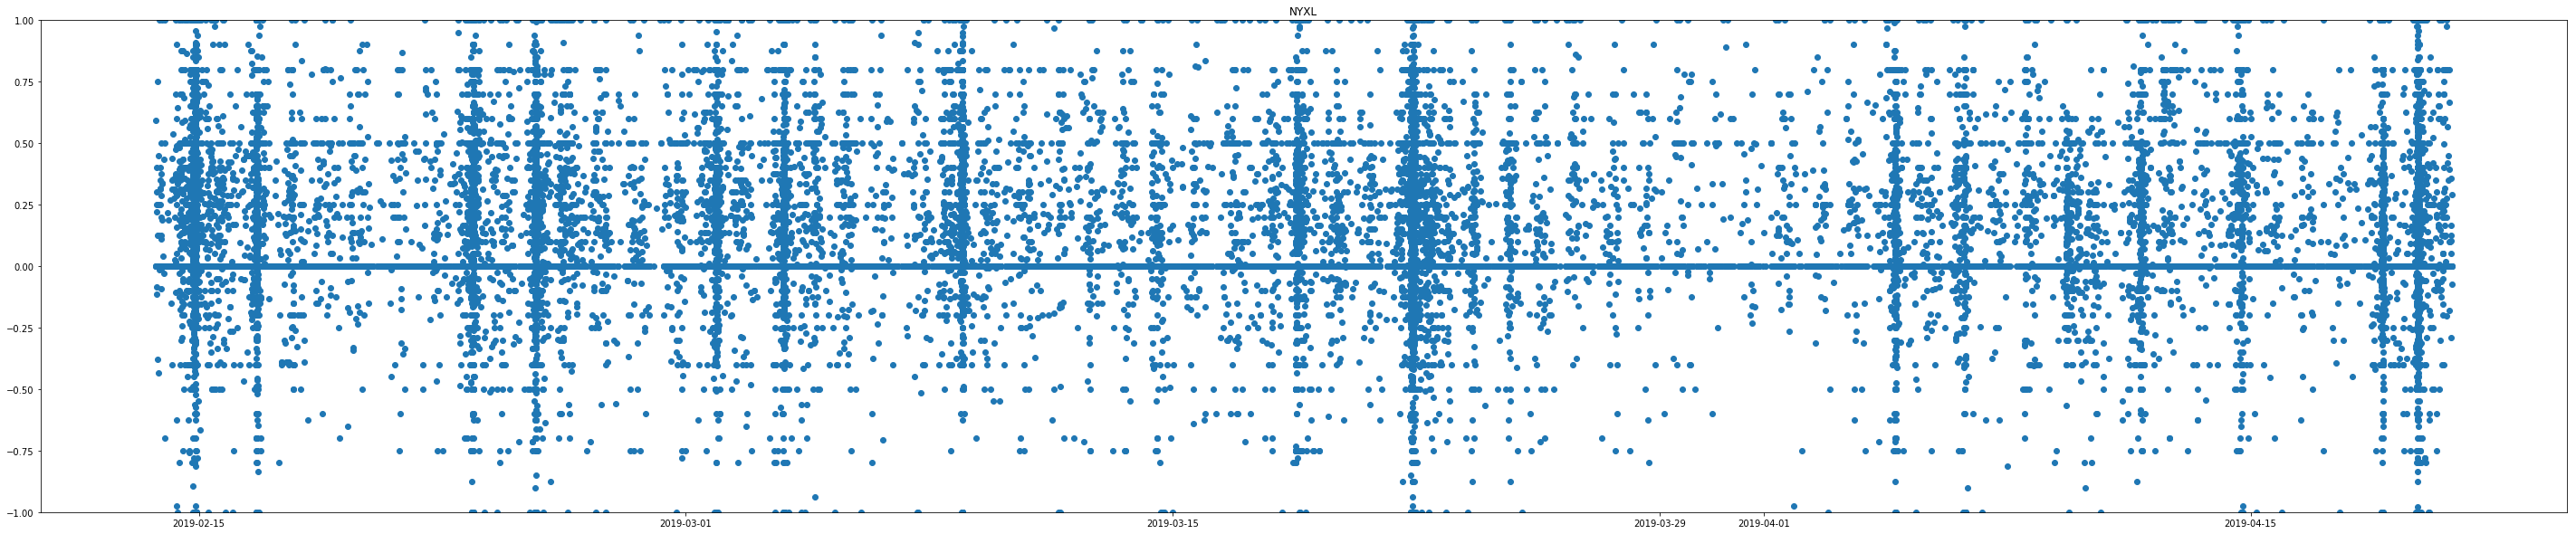

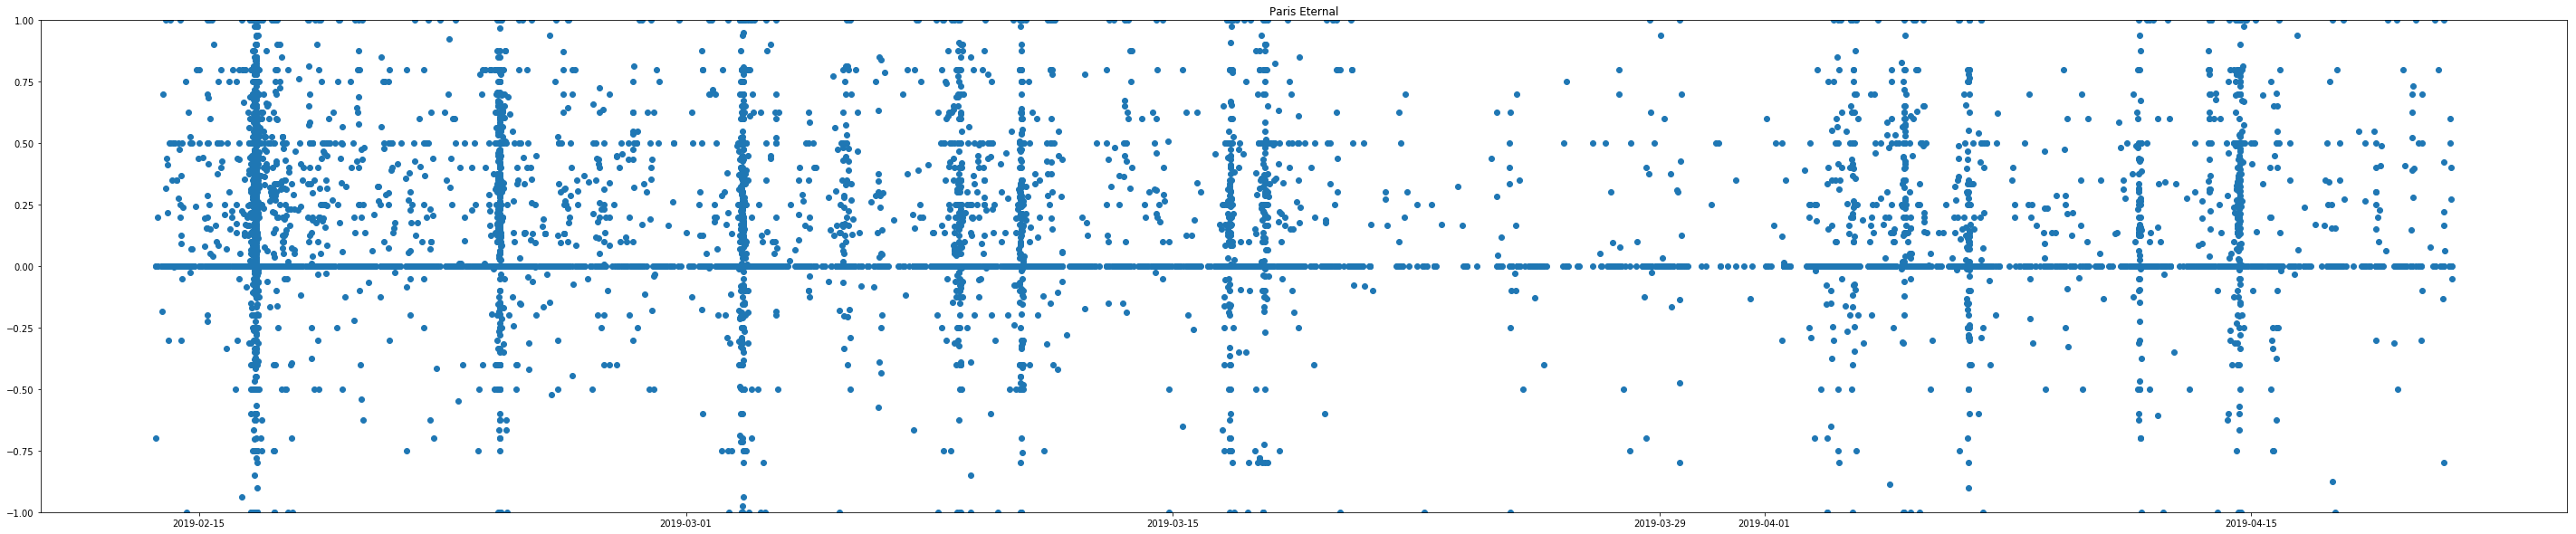

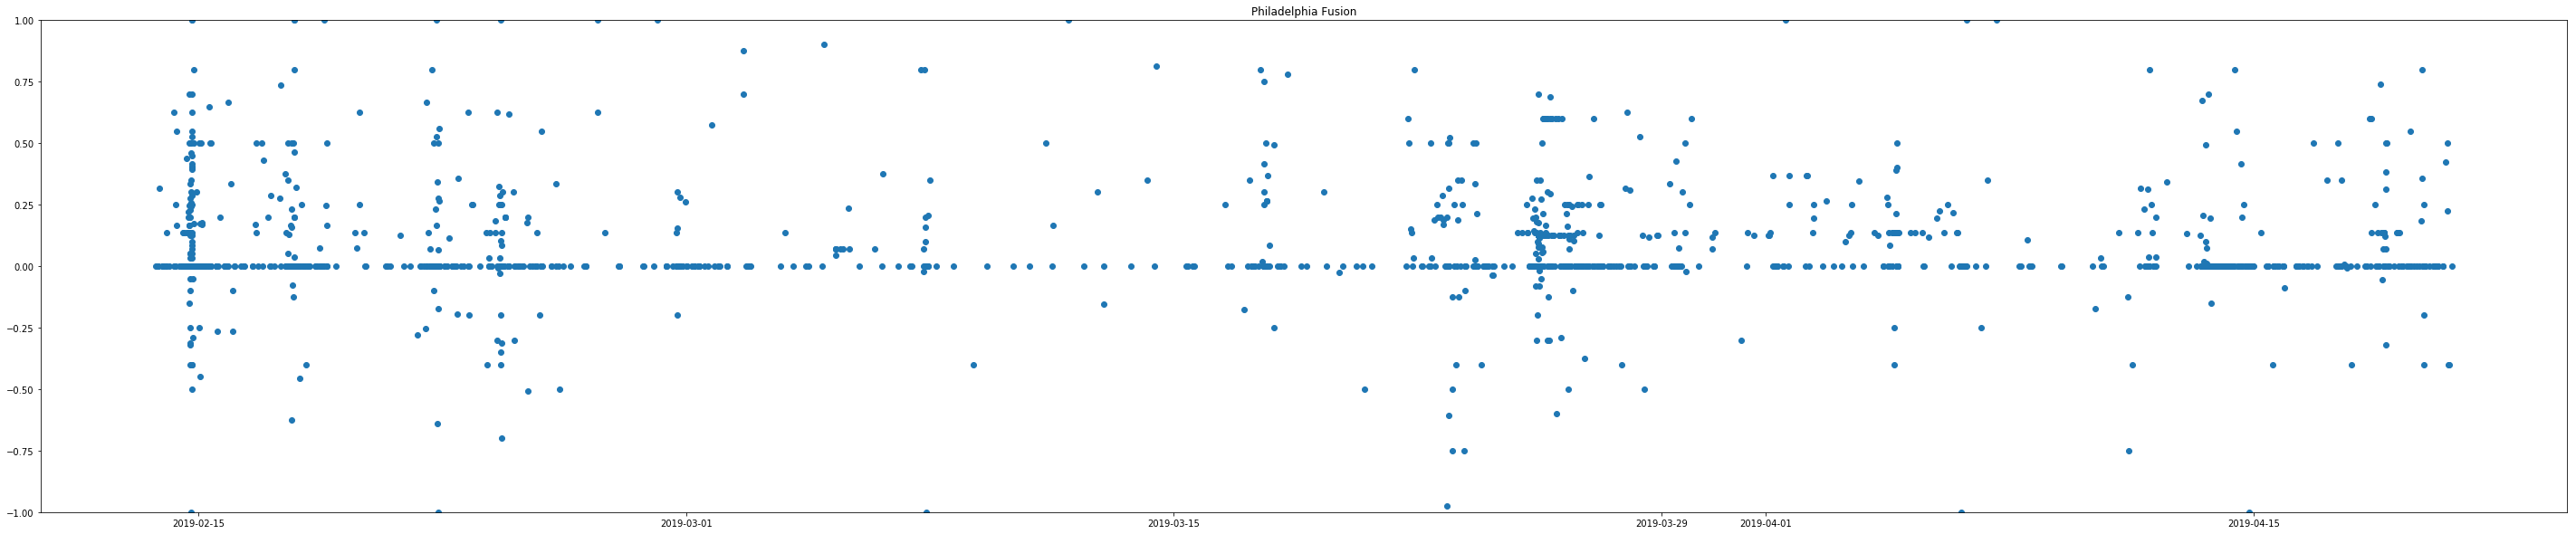

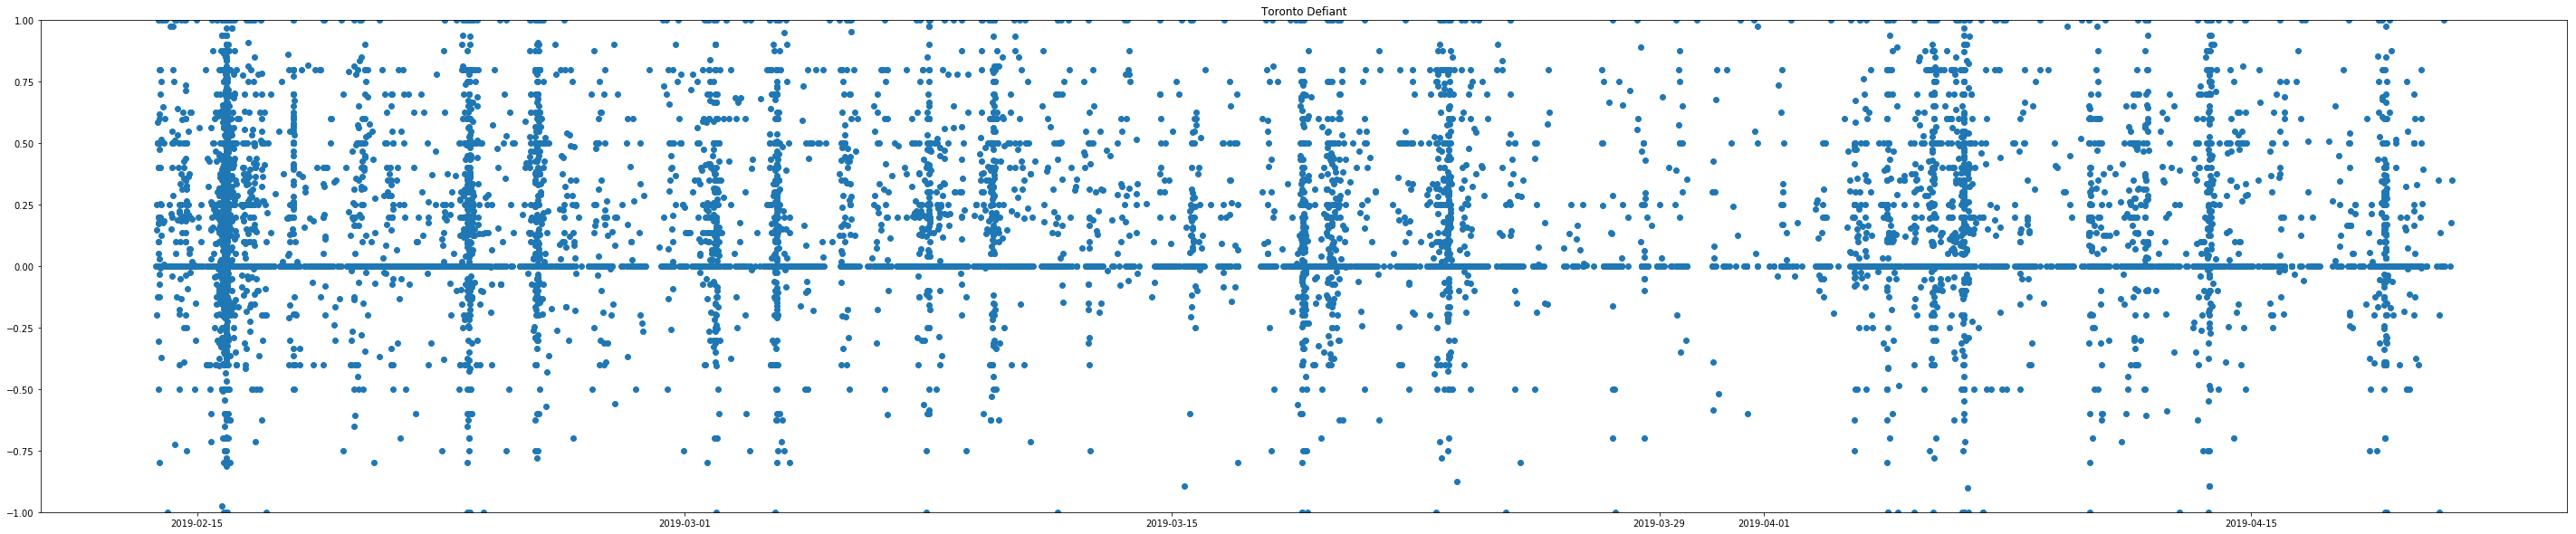

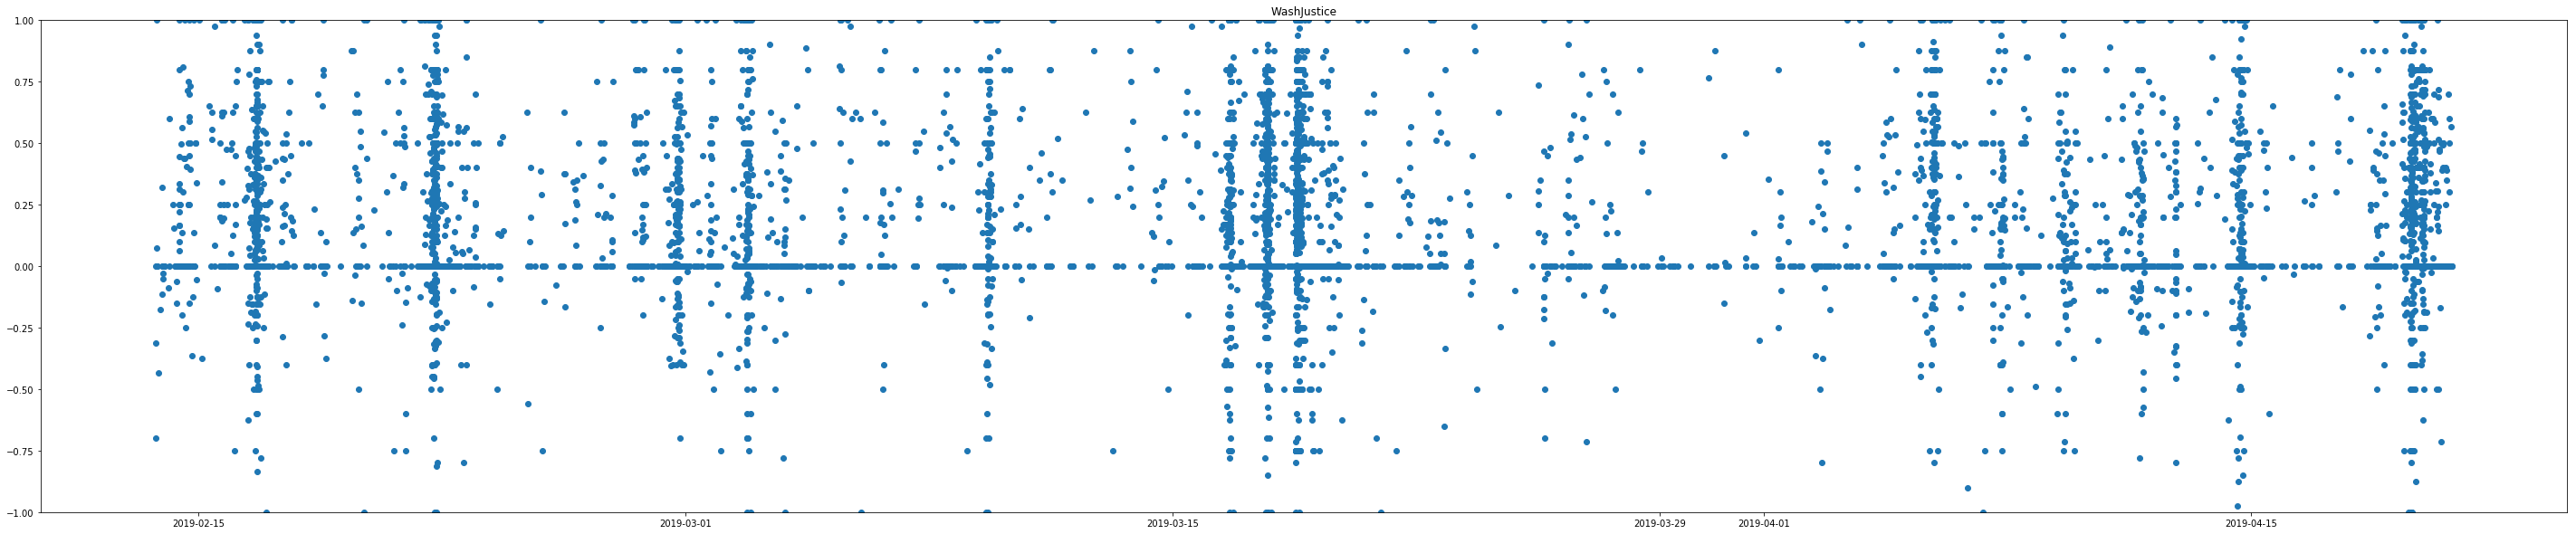

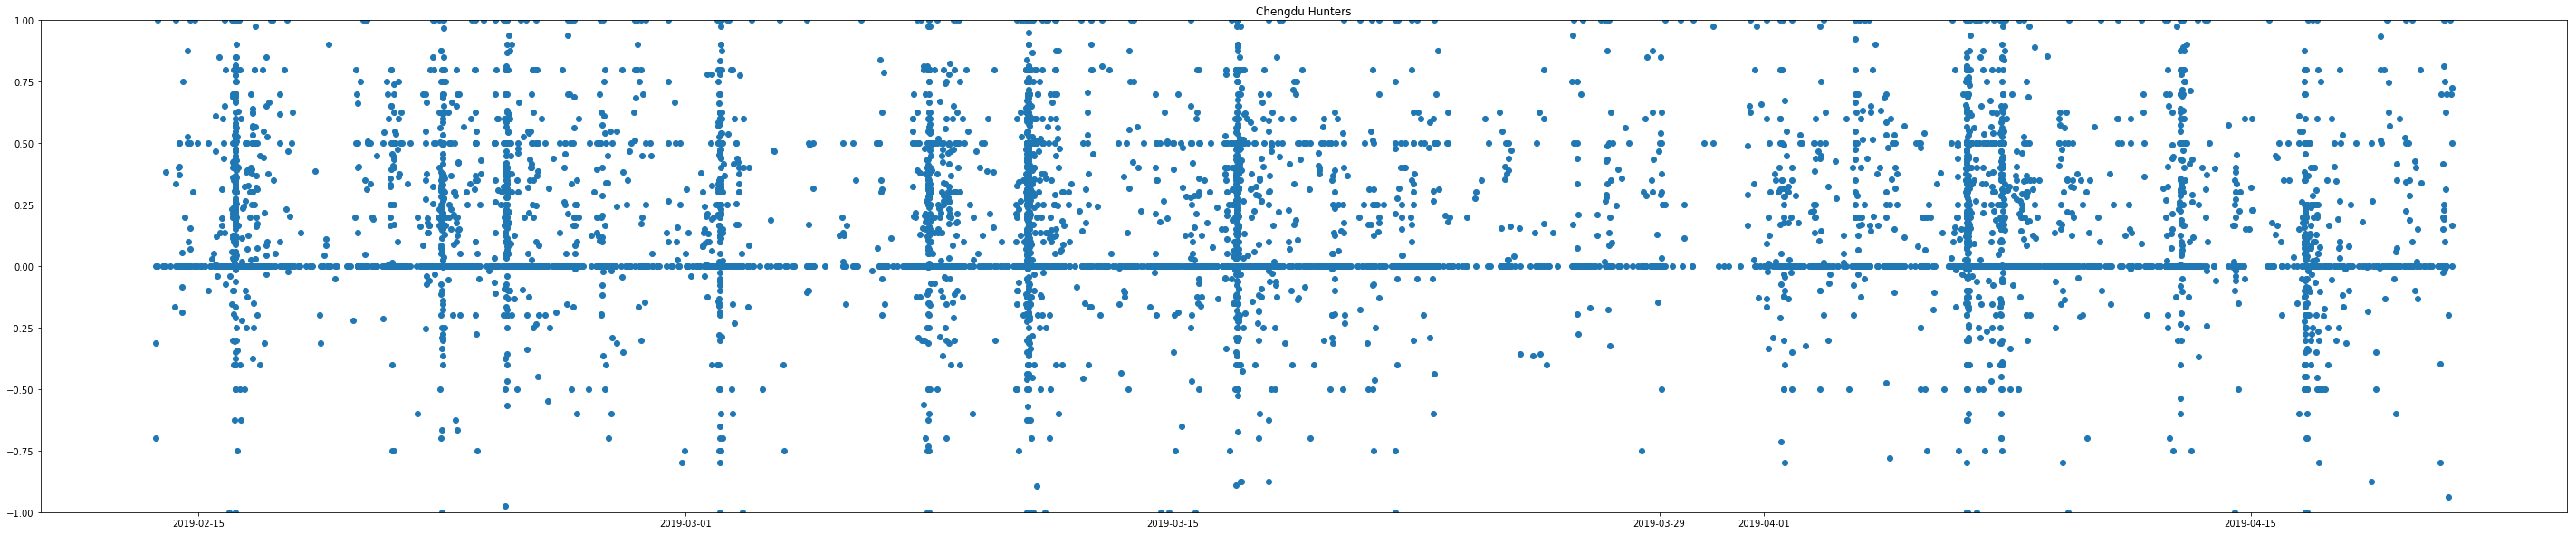

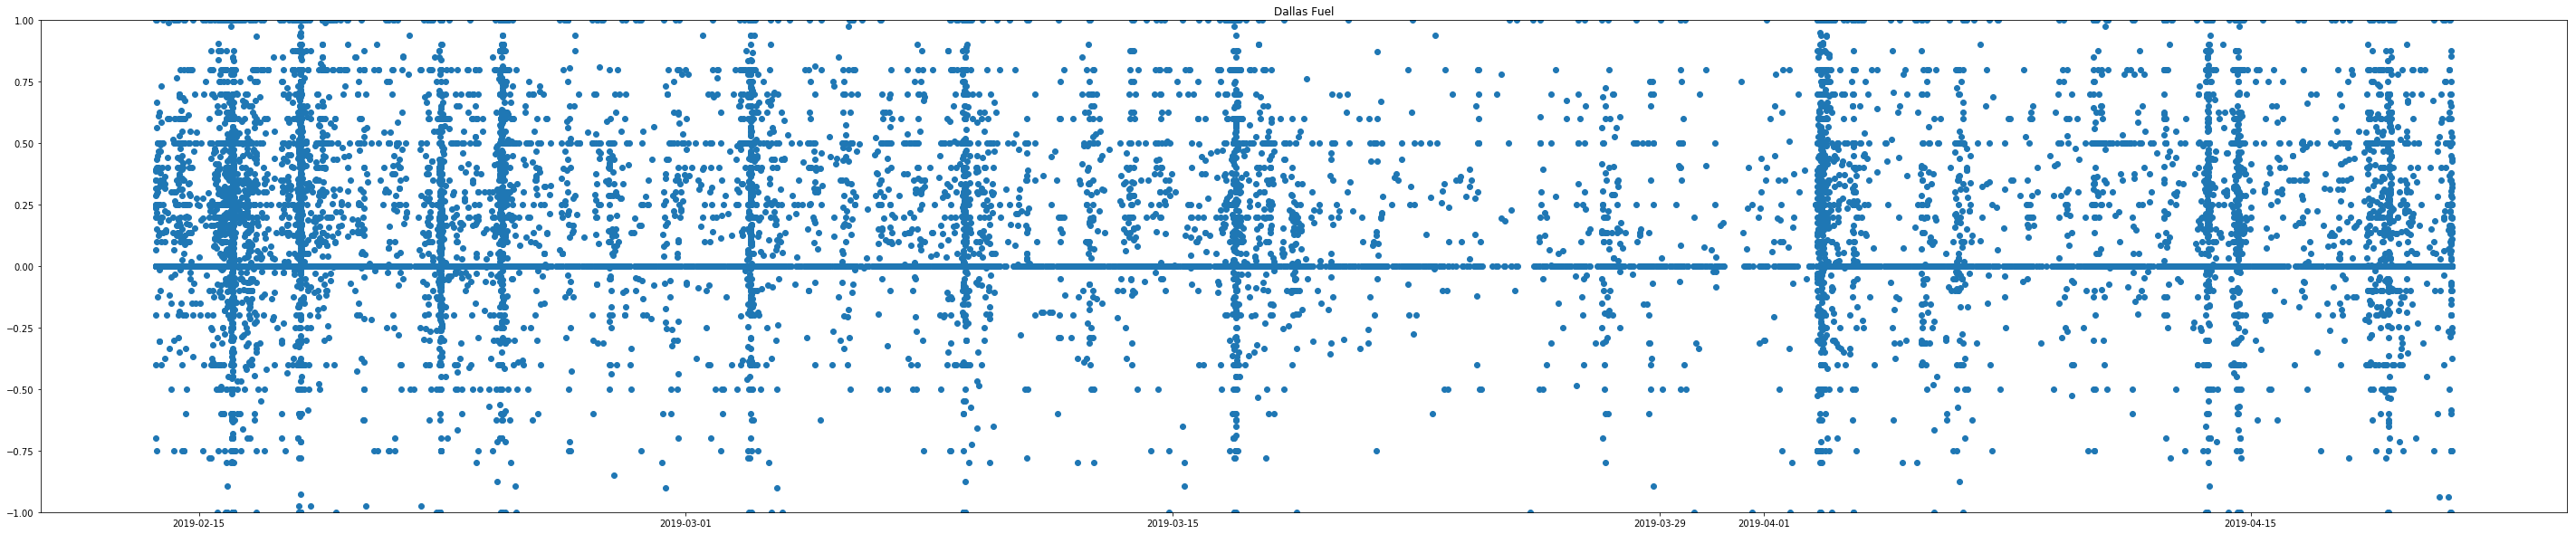

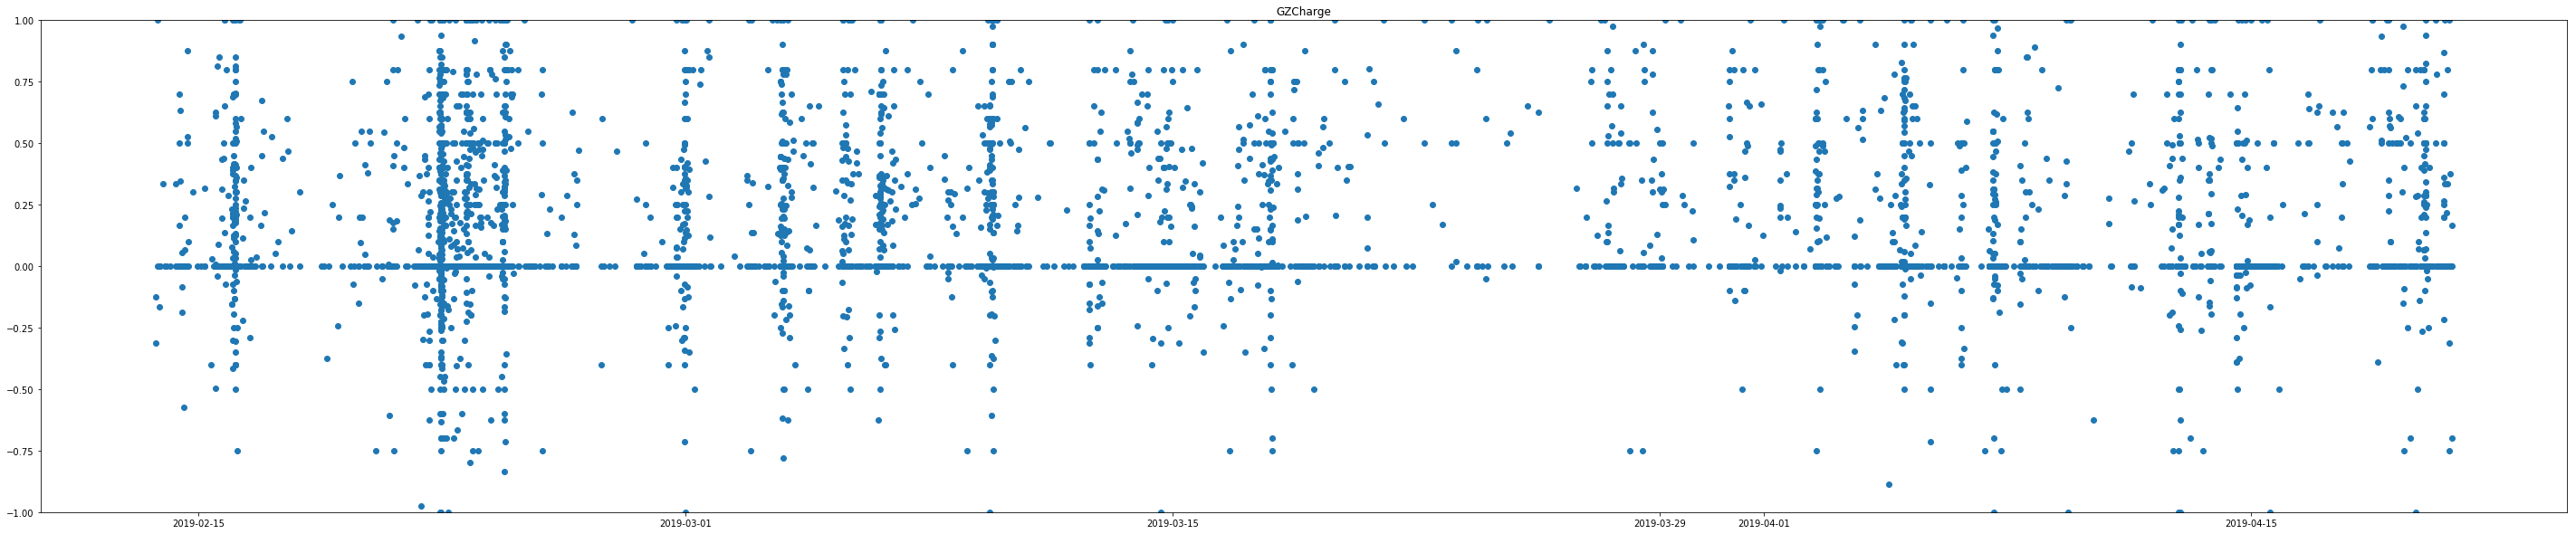

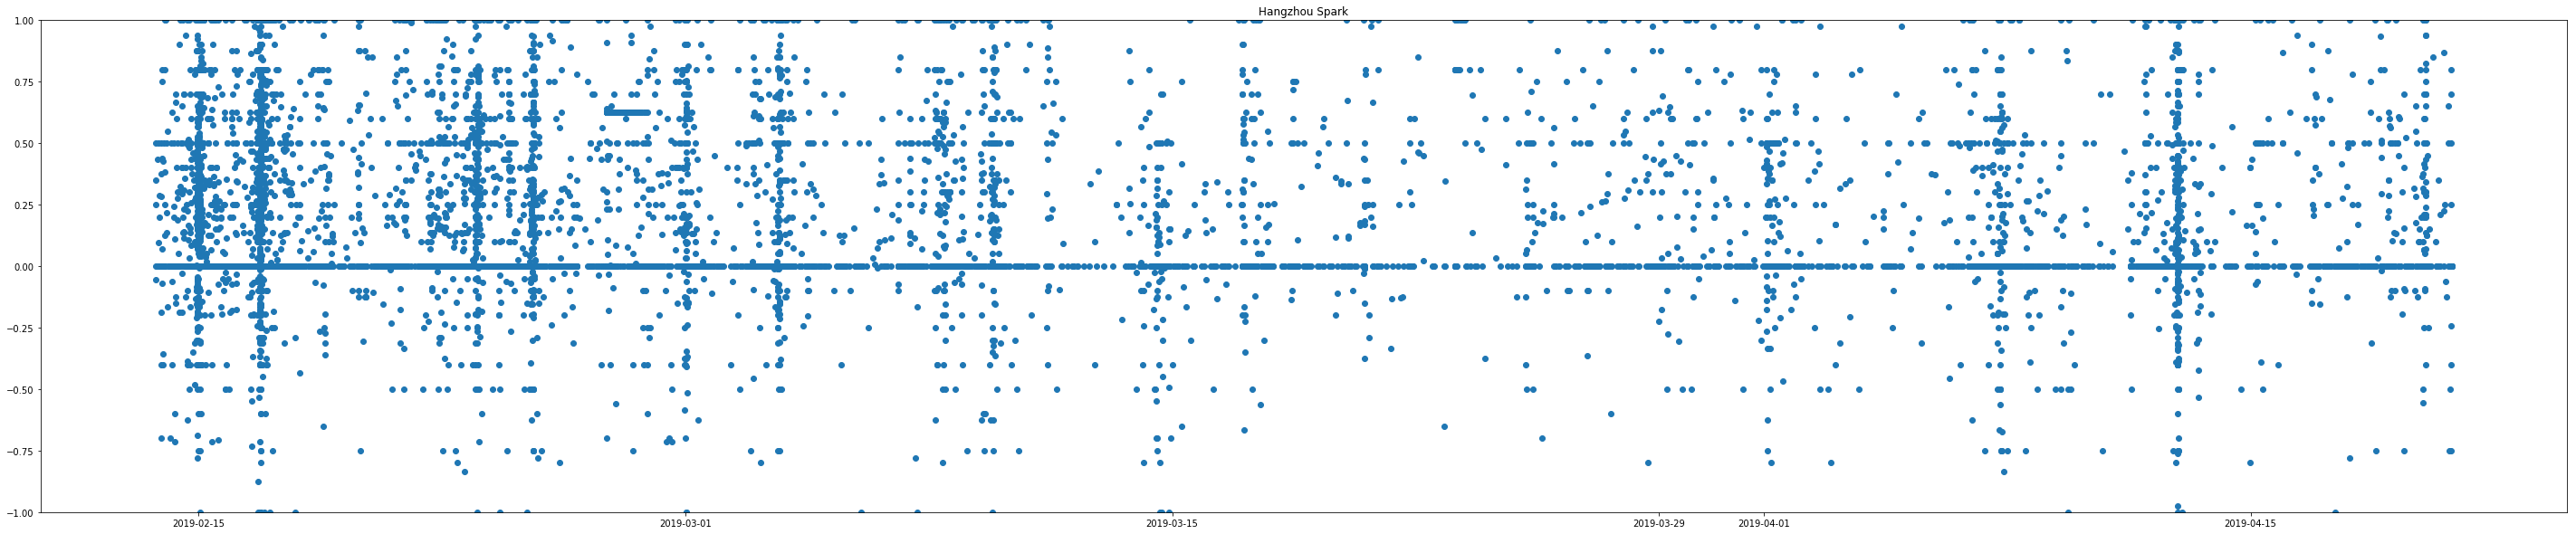

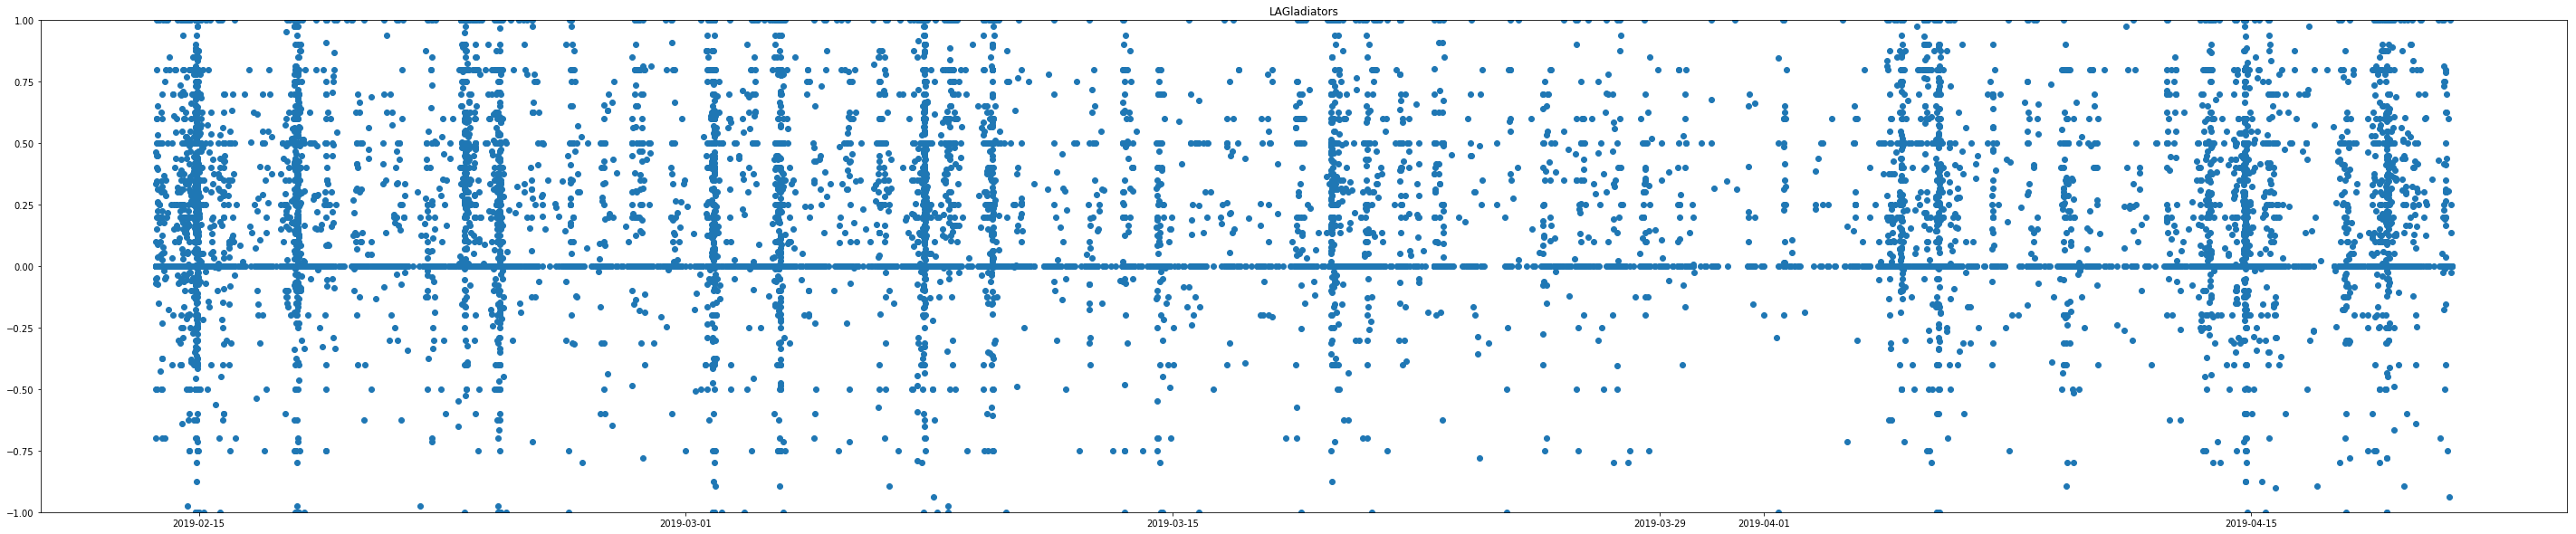

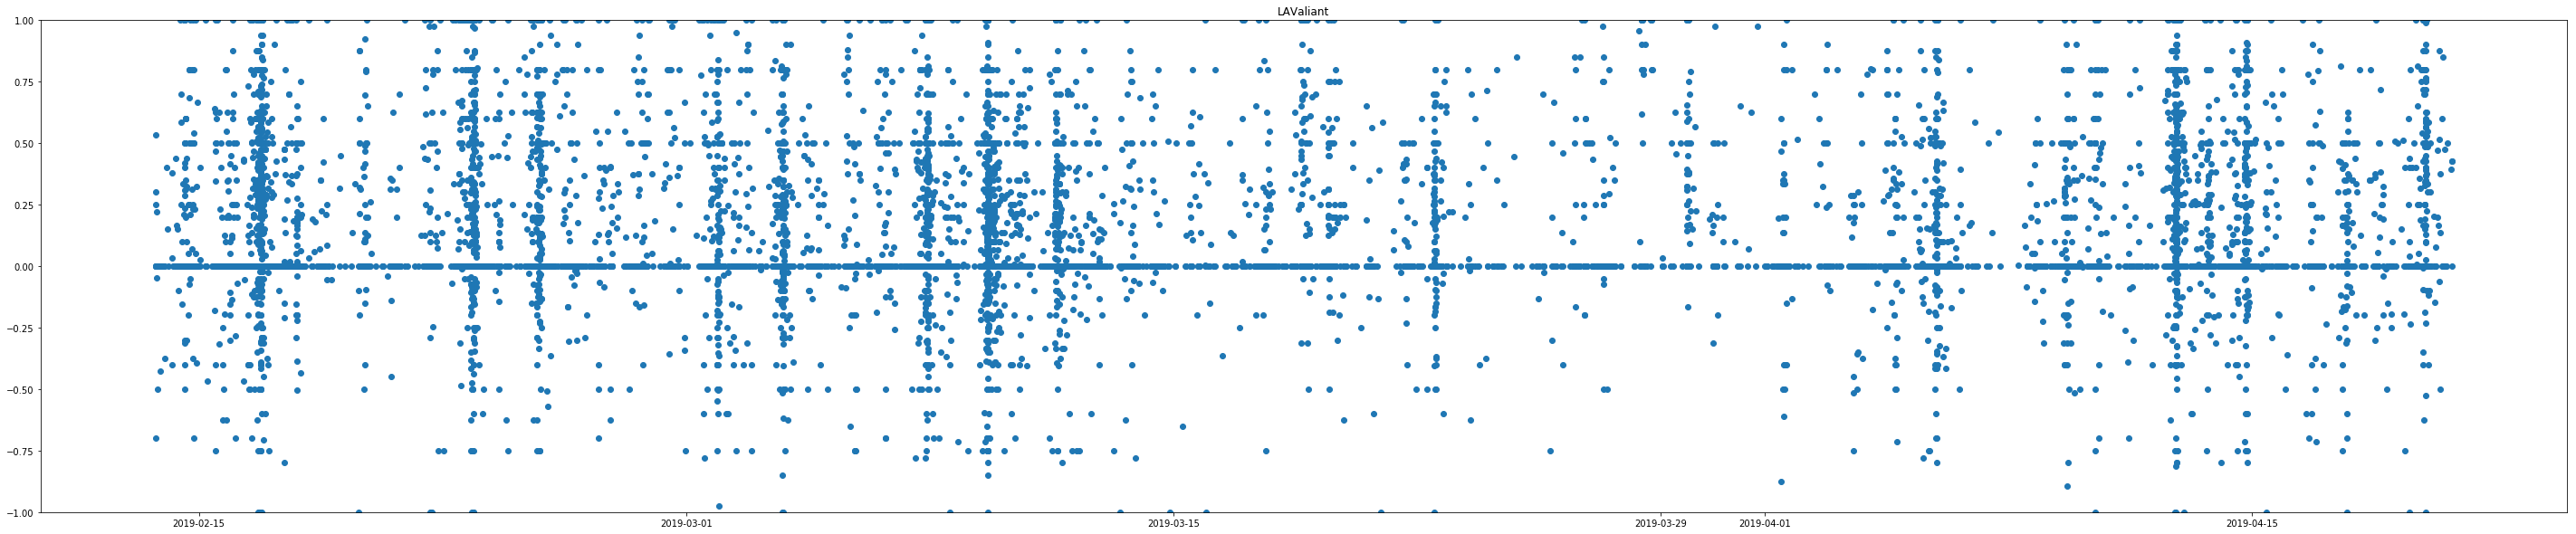

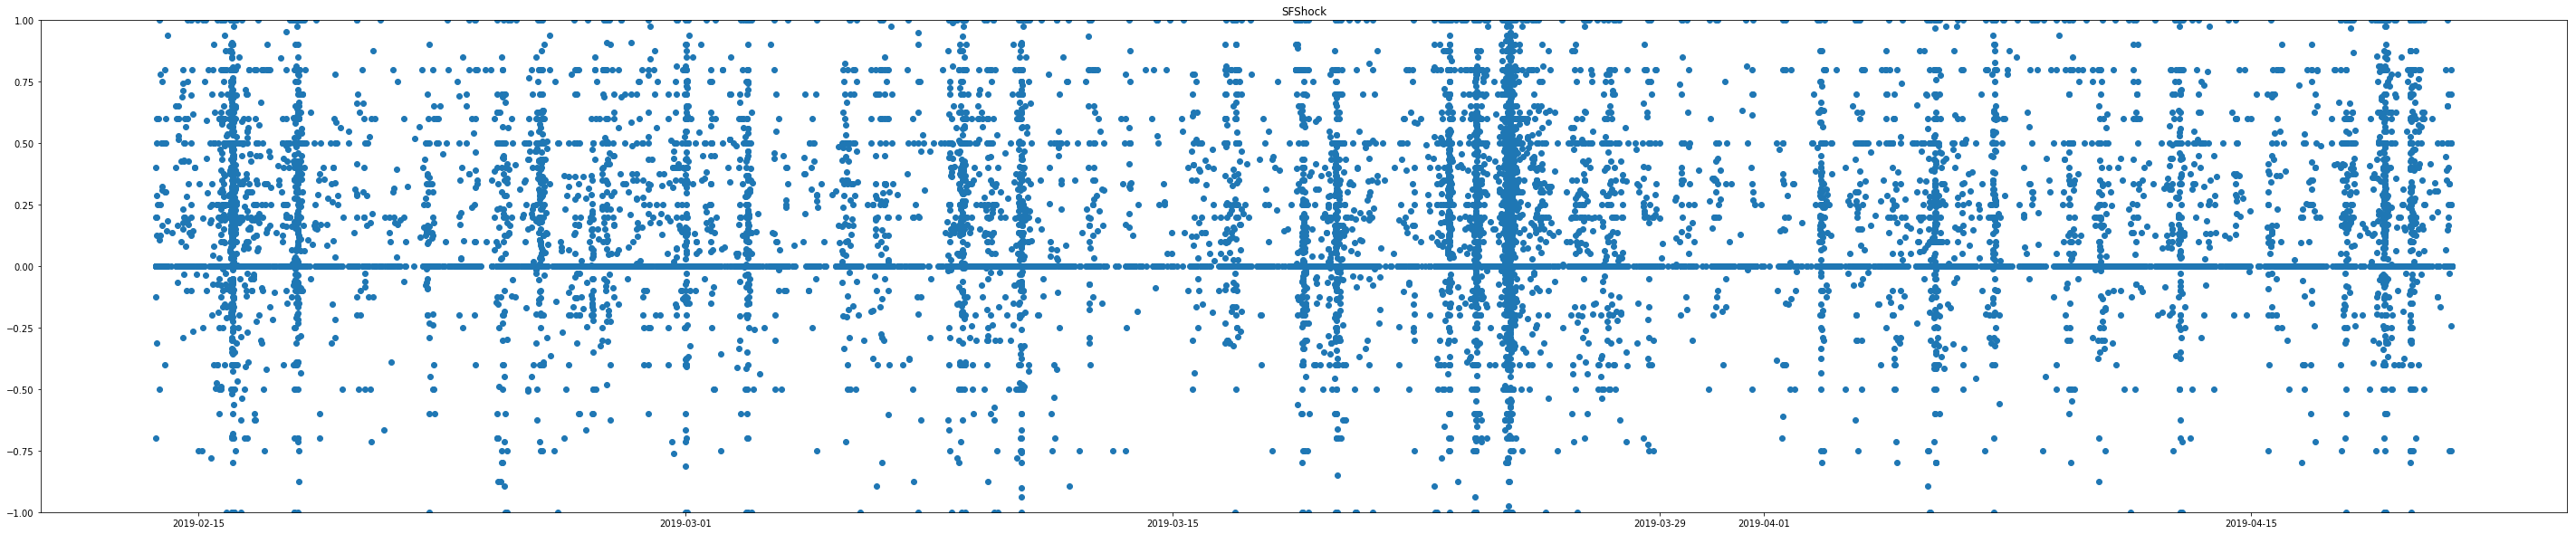

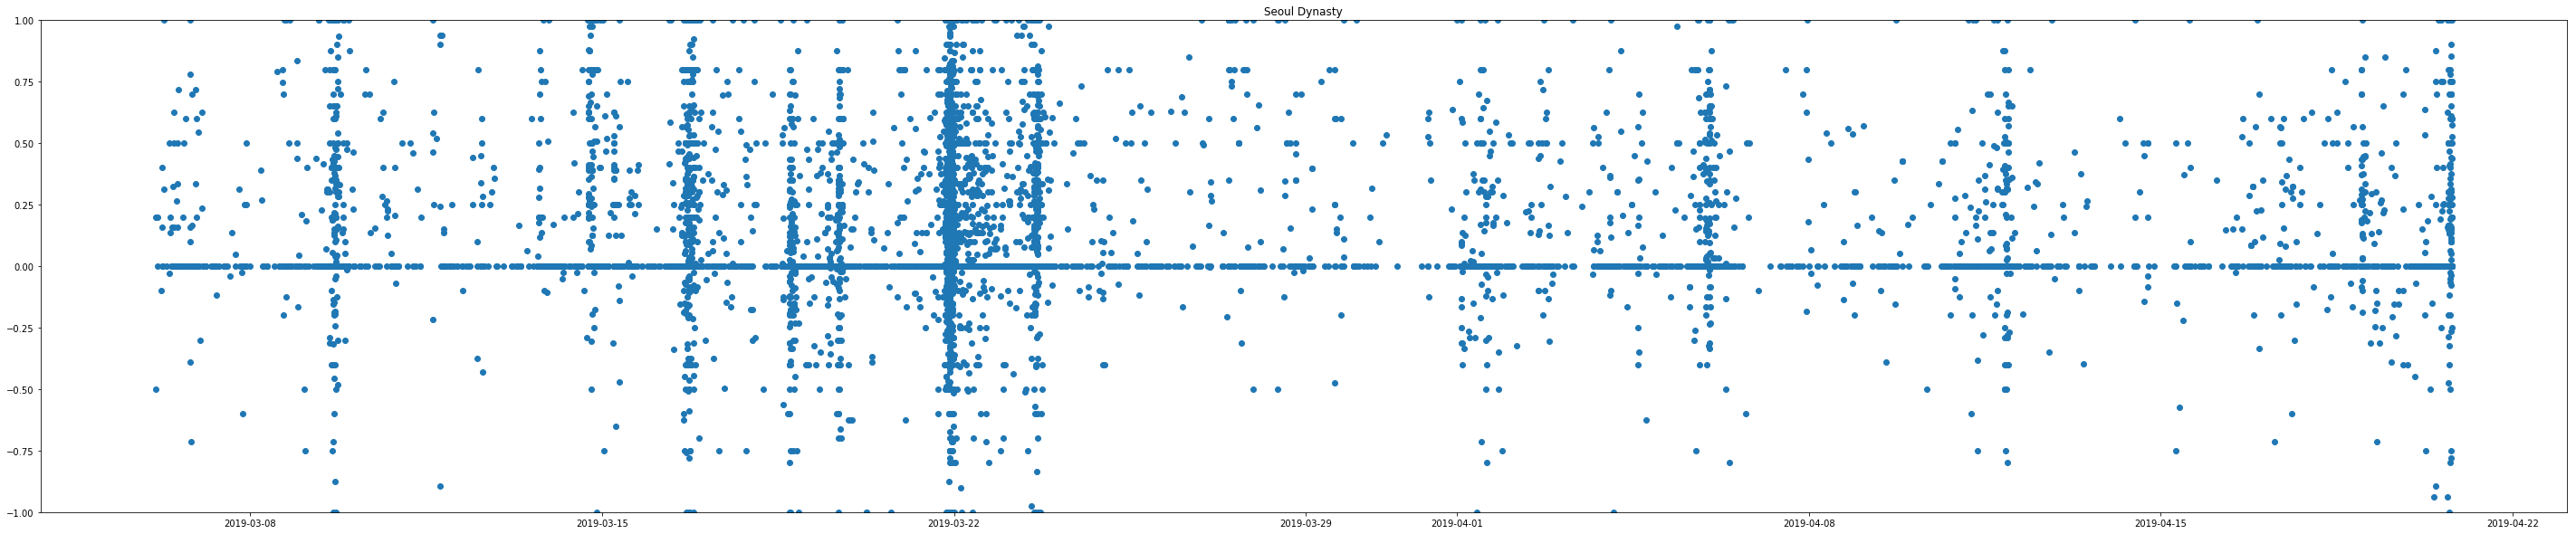

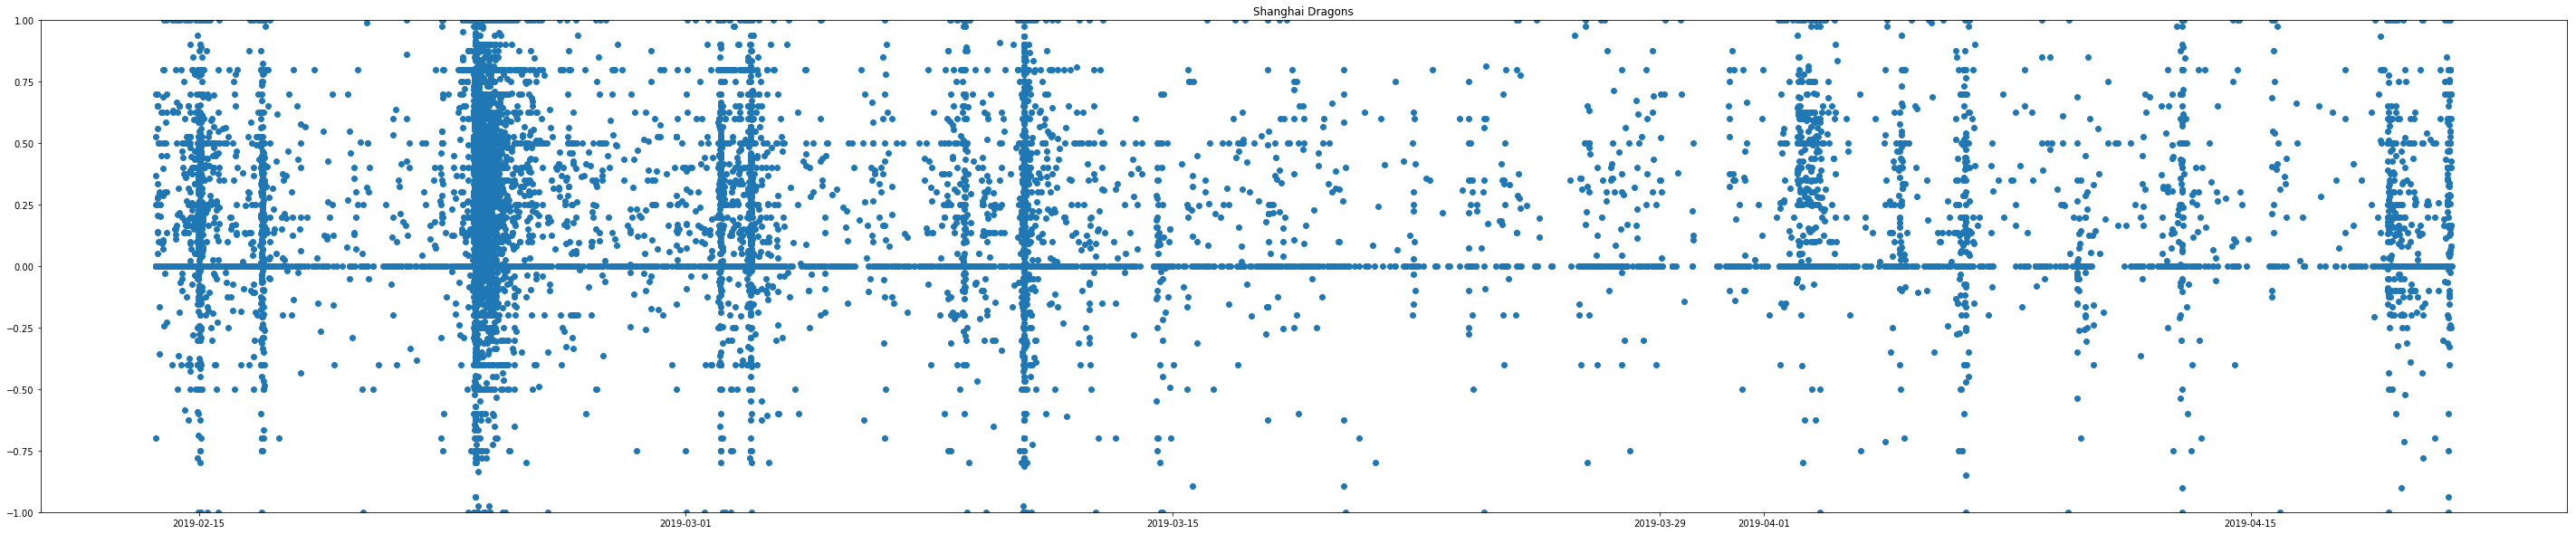

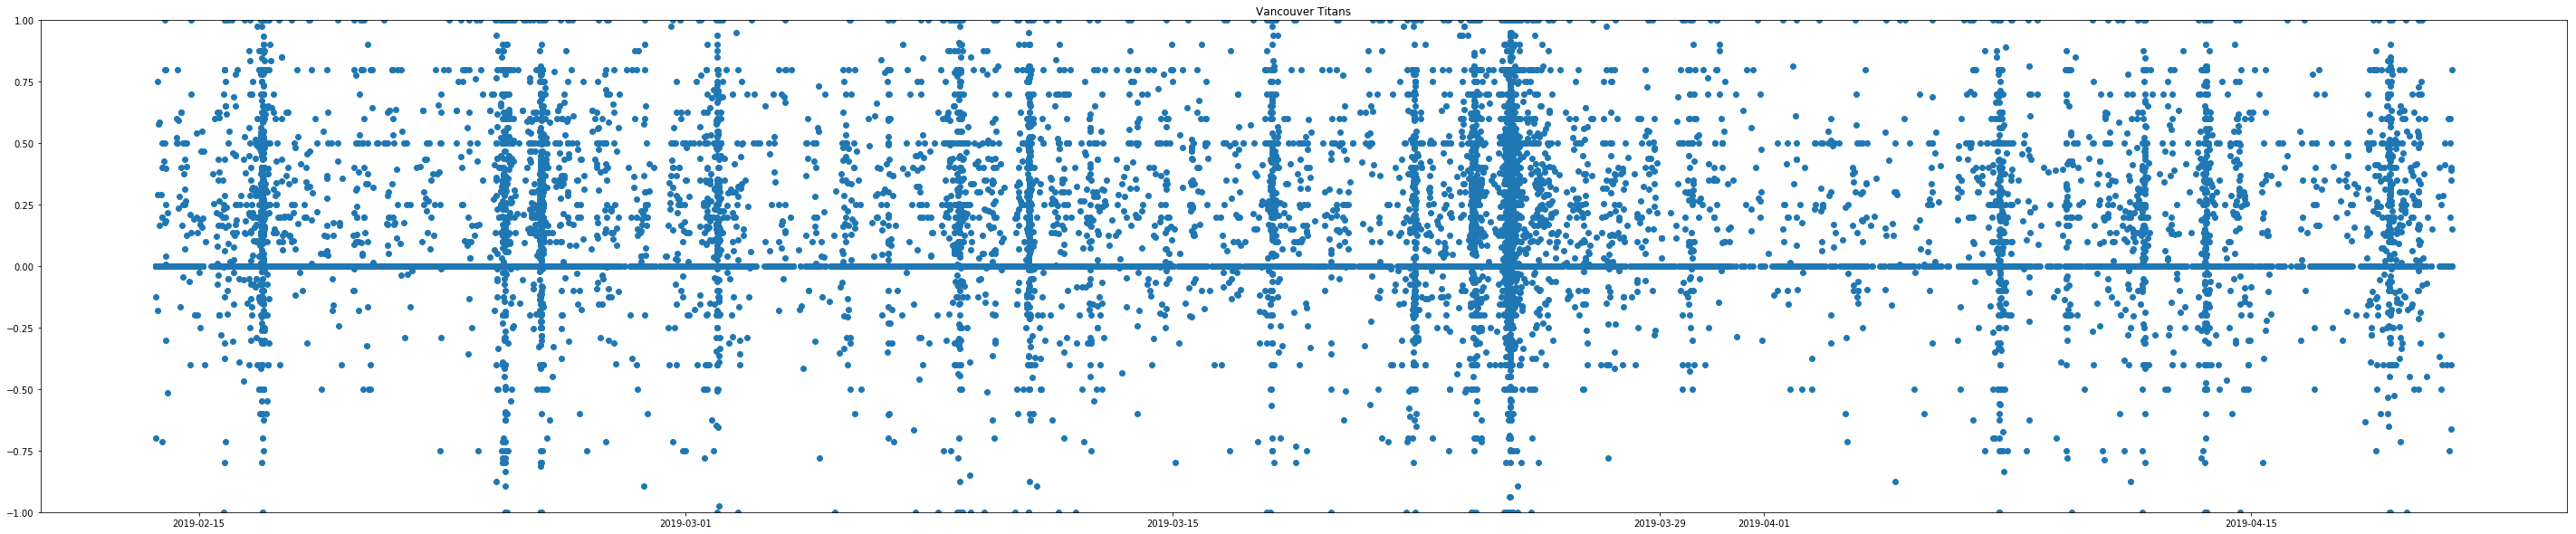

In [6]:
for t_name in env.team_list:
    plot_sentiment(
        team_name=t_name, team_file_paths=env.team_file_paths)